In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams.update({
    'font.size': 20,
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

# Single GPU vs CPU Projector Runtime

In [3]:
df = pd.read_csv("../data/runtimes_projectors.dat")
df.head()

,D,A100,CPU_20core,contractions,rsvd
0,4,0.003355,0.006575,0.000049,0.001674
1,5,0.004222,0.015909,0.000139,0.002537
2,6,0.005721,0.053066,0.000846,0.003895
3,7,0.014943,0.321978,0.004756,0.006764
4,8,0.041905,0.929034,0.022319,0.010847


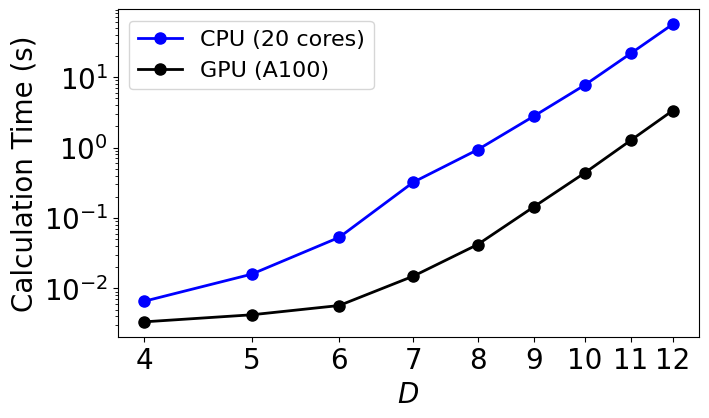

In [4]:
fig, ax = plt.subplots(figsize=(7.5, 4.25))

ax.plot(df['D'], df["CPU_20core"], label='CPU (20 cores)', marker='o', linestyle='-', color='b')
ax.plot(df['D'], df["A100"], label='GPU (A100)', marker='o', linestyle='-', color='k')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel('Calculation Time (s)')
ax.set_xlabel('$D$')
ax.legend(fontsize=16)
ax.tick_params(axis='both', which='major')
ax.set_xticks(df['D'])
ax.set_xticklabels(df['D'])

plt.savefig('a100_vs_20core_projtime.pdf', format="pdf", dpi=300, bbox_inches='tight')
plt.show()

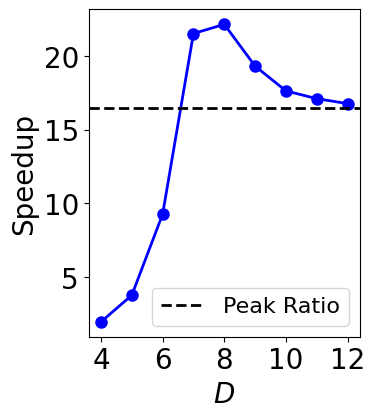

In [5]:
fig, ax = plt.subplots(figsize=(3.5, 4.25))

x = np.array([4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.plot(df['D'], df["CPU_20core"]/df["A100"], label=None, marker='o', linestyle='-', color='b')
plt.axhline(y=16.47, color='black', linestyle='--', linewidth=2, label='Peak Ratio')

ax.set_xticks(x[x%2==0])
ax.set_xlim(4*0.9,12+4*0.1)
ax.set_xlabel('$D$')
ax.set_ylabel('Speedup')
ax.legend(loc="lower right", fontsize=16)
ax.tick_params(axis='both', which='major')

plt.savefig('a100_vs_20core_speedup.pdf', format="pdf", dpi=300, bbox_inches='tight')
plt.show()

## Projector Breakdown

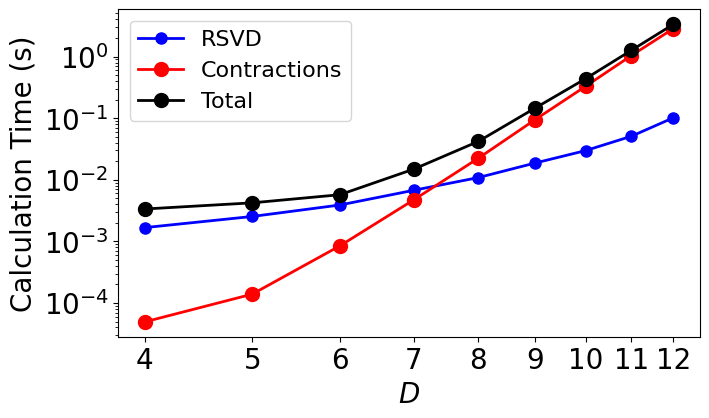

In [6]:
fig, ax = plt.subplots(figsize=(7.5, 4.25))

ax.plot(df['D'], df['rsvd'], label='RSVD', marker='o', linestyle='-', color='blue')
ax.plot(df['D'], df['contractions'], label='Contractions', marker='o', markeredgewidth=3, linestyle='-', color='red')
ax.plot(df['D'], df['A100'], label='Total', marker='o', markeredgewidth=3, linestyle='-', color='black')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$D$')
ax.set_ylabel('Calculation Time (s)')
ax.legend(fontsize=16)
ax.tick_params(axis='both', which='major')
ax.set_xticks(df['D'])
ax.set_xticklabels(df['D'])

plt.savefig('a100_projector_breakdown.pdf', format="pdf", dpi=300, bbox_inches='tight')
plt.show()

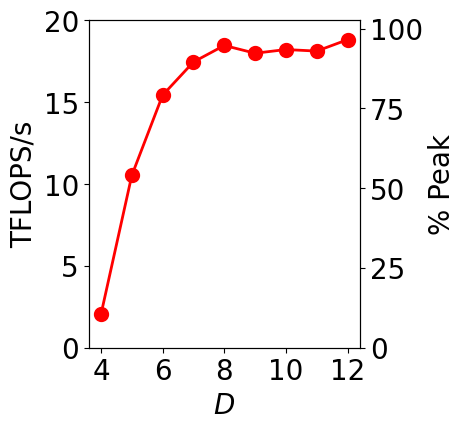

In [7]:
fig, ax = plt.subplots(figsize=(3.5, 4.25))

ax.plot(df['D'], 6*x**12/df['contractions']/10**12, label='$\chi=D^2$', marker='o', markeredgewidth=3, linestyle='-', color='red')
ax.set_xlabel('$D$')
ax.set_ylabel('TFLOPS/s')
ax.tick_params(axis='both', which='major')
ax.set_xticks(x[x%2==0])
ax.set_xticklabels(x[x%2==0])
ax.set_ylim([0,20])

peak_value = 19.5
ax2 = ax.twinx()
ax2.set_ylabel('% Peak')
ax2.tick_params(axis='both', which='major')
ax2.set_ylim([val / peak_value * 100 for val in ax.get_ylim()])

plt.savefig('a100_contraction_flops.pdf', format="pdf", dpi=300, bbox_inches='tight')
plt.show()

# Single GPU vs CPU Full Update Runtime

In [8]:
df = pd.read_csv("../data/runtimes_full_upd.dat")
df.head()

,D,A100,CPU_20core,build_norm,als_cholesky,ffupd
0,4,0.011558,0.011765,0.000769,0.008873,0.026476
1,5,0.012530,0.020168,0.000770,0.008941,0.031259
2,6,0.013170,0.042780,0.001074,0.009274,0.038440
3,7,0.015971,0.112313,0.003015,0.009407,0.080273
4,8,0.020836,0.320239,0.007020,0.009435,0.202716


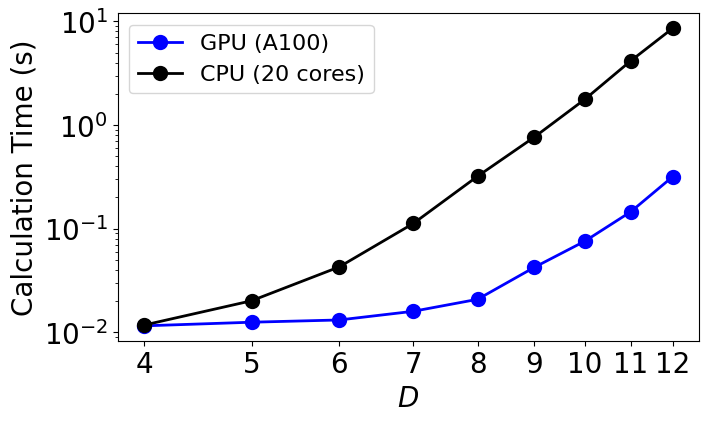

In [9]:
fig, ax = plt.subplots(figsize=(7.5, 4.25))

ax.plot(df['D'], df['A100'], '-ob', label='GPU (A100)', markeredgewidth=3)
ax.plot(df['D'], df['CPU_20core'], '-ok', label='CPU (20 cores)', markeredgewidth=3)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$D$')
ax.set_ylabel('Calculation Time (s)')
ax.legend(fontsize=16)
ax.set_xticks(df['D'])
ax.set_xticklabels(df['D'])

plt.savefig('a100_vs_20core_full_upd_time.pdf', format="pdf", dpi=300, bbox_inches='tight')
plt.show()

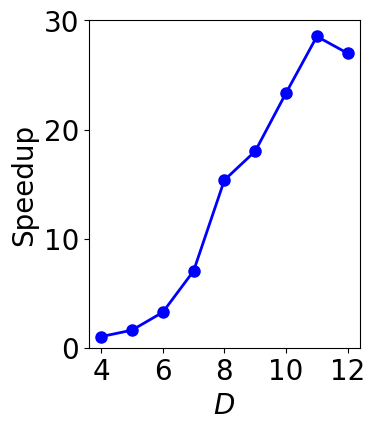

In [10]:
fig, ax = plt.subplots(figsize=(3.5, 4.25))

ax.plot(df['D'], df["CPU_20core"]/df["A100"], label=None, marker='o', linestyle='-', color='b')

ax.set_xlim(4*0.9,12+4*0.1)
ax.set_ylim(0,30)
ax.set_xlabel('$D$')
ax.set_ylabel('Speedup')
ax.set_xticks(df['D'][df['D']%2==0])
ax.set_xticklabels(df['D'][df['D']%2==0])
plt.savefig('a100_vs_20core_full_upd_speedup.pdf', format="pdf", dpi=300, bbox_inches='tight')
plt.show()

## Full Update Breakdown

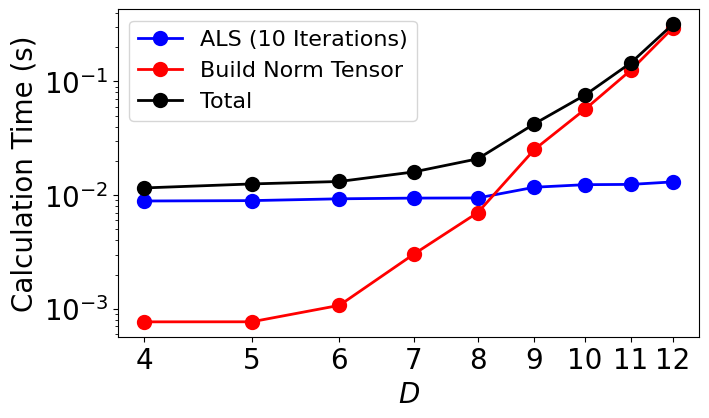

In [11]:
fig, ax = plt.subplots(figsize=(7.5, 4.25))

ax.plot(df['D'], df['als_cholesky'], '-ob', label='ALS (10 Iterations)', markeredgewidth=3)
ax.plot(df['D'], df['build_norm'], '-or', label='Build Norm Tensor', markeredgewidth=3)
ax.plot(df['D'], df['A100'], '-ok', label='Total', markeredgewidth=3)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$D$')
ax.set_ylabel('Calculation Time (s)')
ax.legend(fontsize=16)
ax.set_xticks(df['D'])
ax.set_xticklabels(df['D'])

plt.savefig('a100_full_upd_breakdown.pdf', format="pdf", dpi=300, bbox_inches='tight')
plt.show()

## Fraction of Fast-Full Update

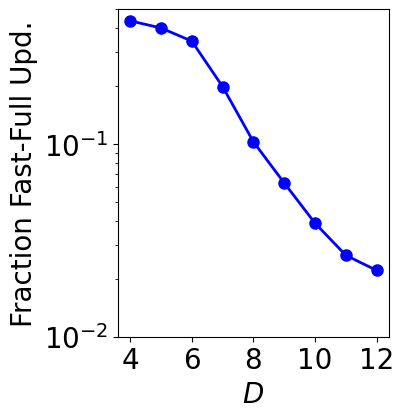

In [12]:
fig, ax = plt.subplots(figsize=(3.5, 4.25))

ax.plot(df['D'], df['A100']/df['ffupd'], label=None, marker='o', linestyle='-', color='b')

ax.set_yscale('log')
ax.set_xlabel('$D$')
ax.set_ylabel('Fraction Fast-Full Upd.')
ax.set_ylim(0.01,0.5)
ax.set_xlim(4*0.9,12+4*0.1)
ax.set_xticks(df['D'][df['D']%2==0])
ax.set_xticklabels(df['D'][df['D']%2==0])

plt.savefig('a100_fraction_fast_full_upd.pdf', format="pdf", dpi=300, bbox_inches='tight')
plt.show()

# Multi-A100 Up-Down Move Runtime

In [13]:
df = pd.read_csv("../data/runtimes_multigpu_move.dat")
df.head()

,D,1_A100,2_A100,4_A100
0,4,0.014407,0.010029,0.006859
1,5,0.017943,0.011811,0.007354
2,6,0.023956,0.014919,0.009089
3,7,0.062868,0.035326,0.020070
4,8,0.180163,0.097915,0.054349


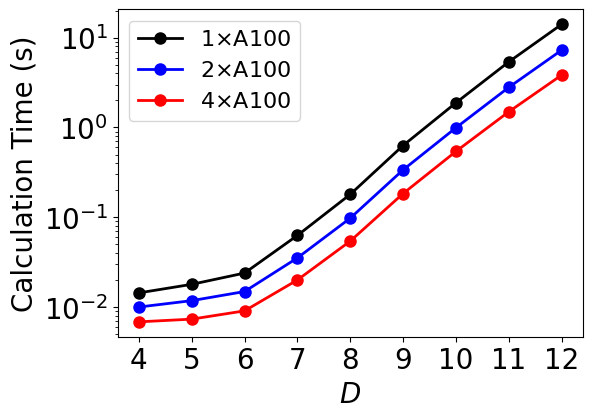

In [14]:
fig, ax = plt.subplots(figsize=(6.0, 4.25))

ax.plot(df['D'], df['1_A100'], label='1${\\times}$A100', marker='o', linestyle='-', color='k')
ax.plot(df['D'], df['2_A100'], label='2${\\times}$A100', marker='o', linestyle='-', color='b')
ax.plot(df['D'], df['4_A100'], label='4${\\times}$A100', marker='o', linestyle='-', color='r')

ax.set_yscale('log')
ax.set_xlabel('$D$')
ax.set_ylabel('Calculation Time (s)')
ax.legend(fontsize=16)
ax.tick_params(axis='both', which='major')
ax.set_xticks(df['D'])
ax.set_xticklabels(df['D'])

plt.savefig('multigpu_runtime.pdf', format="pdf", dpi=300, bbox_inches='tight')
plt.show()

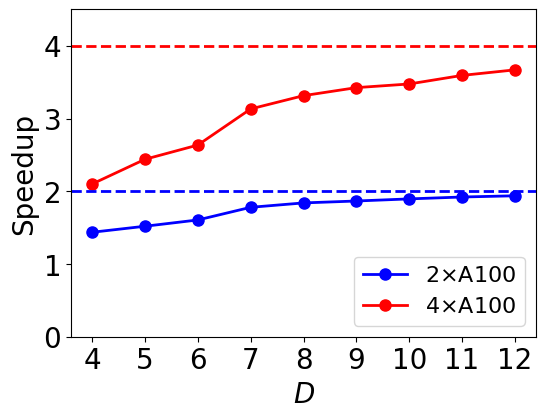

In [15]:
fig, ax = plt.subplots(figsize=(6.0, 4.25))

ax.plot(df['D'], df['1_A100']/df['2_A100'], label='2${\\times}$A100', marker='o', linestyle='-', color='b')
ax.plot(df['D'], df['1_A100']/df['4_A100'], label='4${\\times}$A100', marker='o', linestyle='-', color='r')
plt.axhline(y=2., color='blue', linestyle='--', linewidth=2, label=None)
plt.axhline(y=4., color='red', linestyle='--', linewidth=2, label=None)

ax.set_xlabel('$D$')
ax.set_ylabel('Speedup')
ax.legend(fontsize=16, loc="lower right")
ax.tick_params(axis='both', which='major')
ax.set_xticks(df['D'])
ax.set_xticklabels(df['D'])
ax.set_ylim(0,4.5)

plt.savefig('multigpu_speedup.pdf', format="pdf", dpi=300, bbox_inches='tight')
plt.show()